In [0]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd 

# Boston Housing Data

* __crim__ - per capita crime rate by town.
* __zn__ - proportion of residential land zoned for lots over 25,000 sq.ft.
* __indus__ - proportion of non-retail business acres per town.
* __chas__ - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* __nox__ - nitrogen oxides concentration (parts per 10 million).
* __rm__ - average number of rooms per dwelling.
* __age__ - proportion of owner-occupied units built prior to 1940.
* __dis__ - weighted mean of distances to five Boston employment centres.
* __rad__ - index of accessibility to radial highways.
* __tax__ - full-value property-tax rate per $10,000.
* __ptratio__ - pupil-teacher ratio by town.
* __black__ - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* __lstat__ - lower status of the population (percent).
* __medv__ - median value of owner-occupied homes in \$1000s.

In [49]:
boston_dataset = load_boston()
print("Alle Attribute: ", boston_dataset.feature_names)
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston

Alle Attribute:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [0]:
#Target setzen
boston['MEDV'] = boston_dataset.target

#Attribute außer target
X = boston_dataset.data
#MEDV Werte
Y = boston_dataset.target

In [51]:
#Trainingset und Testset laden
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


**Testdatensatz trainieren & predicten**

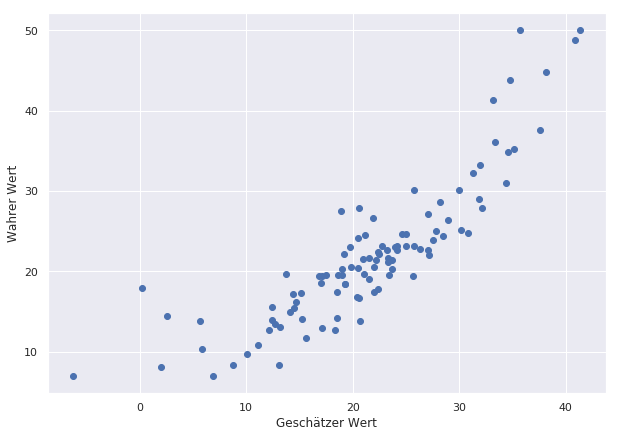

In [53]:
#Lineare Regression mit unseren Trainingsdaten und dann Testdaten predicten
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
y_train_predict = lin_reg.predict(X_test)

plt.scatter(y_train_predict, Y_test)
plt.xlabel("Geschätzer Wert")
plt.ylabel("Wahrer Wert")
plt.show()

In [54]:
mse = mean_squared_error(Y_test, y_train_predict)
print("Mean Squared Error: ", mse)

rmse = (np.sqrt(mean_squared_error(Y_test, y_train_predict)))
print("Root MSE: ", rmse)

Mean Squared Error:  20.869292183770906
Root MSE:  4.568292042303218


In [60]:
house = X_train[0]*1.1
print("Ausgedachtes Haus mit folgenden Werten: ", house)

pred_value = lin_reg.predict(house.reshape(1, -1))
print("Geschätzter Wert:", pred_value)

Ausgedachtes Haus mit folgenden Werten:  [  1.266892   0.         8.954      0.         0.5918     6.2711
 104.5        4.16592    4.4      337.7       23.1      394.647
  20.185   ]
Geschätzter Wert: [11.42039814]


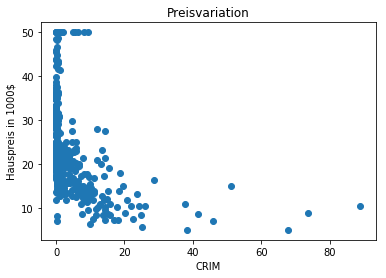

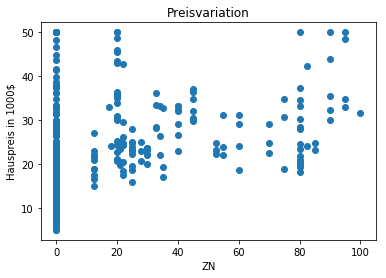

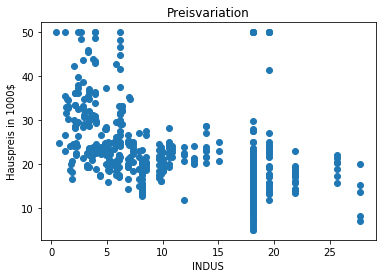

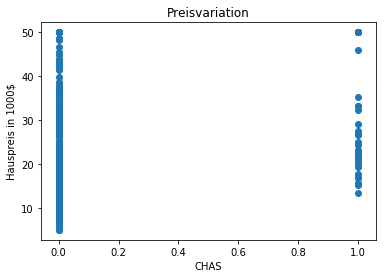

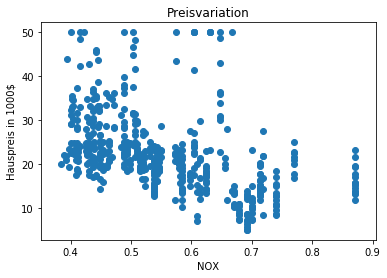

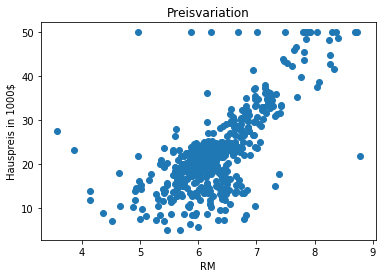

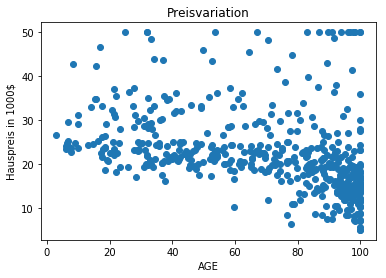

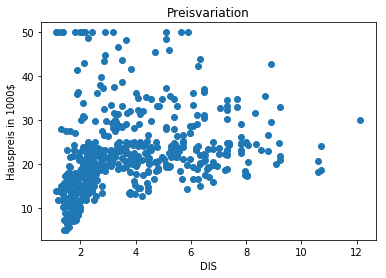

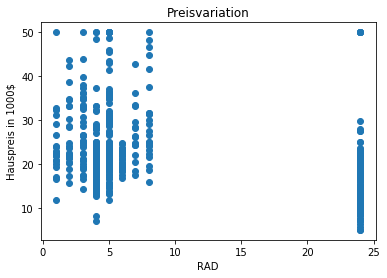

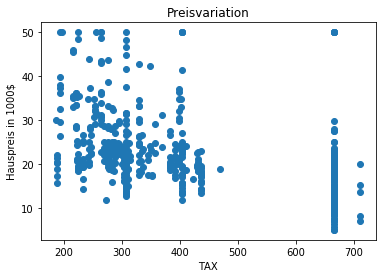

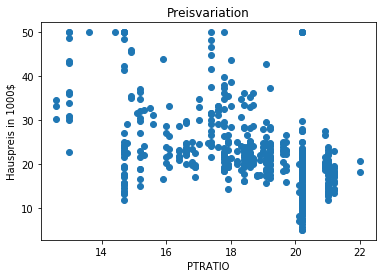

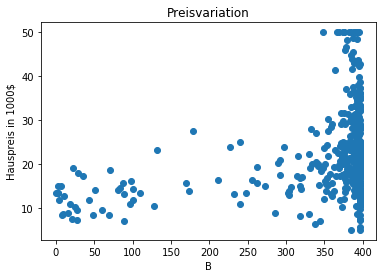

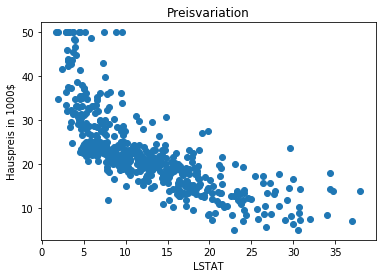

In [33]:
#Alle Features, die für den Preis relevant sein können
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

for i, col in enumerate(features):
    x = boston[col]
    plt.scatter(x, Y, marker='o')
    plt.title("Preisvariation")
    plt.xlabel(col)        
    plt.ylabel("Hauspreis in 1000$")
    plt.show()

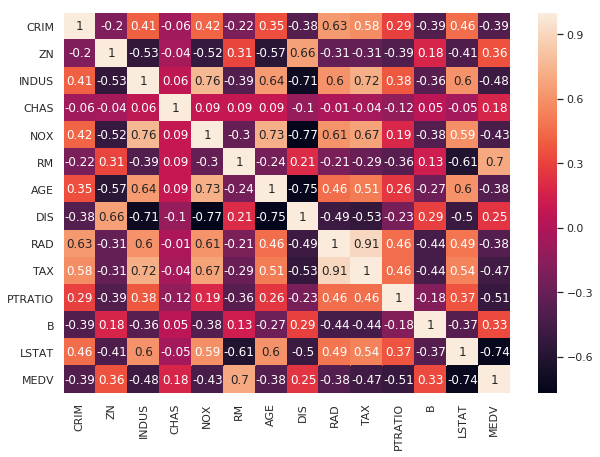

In [76]:
#Vermutung auf LSTAT und RM in Heatmap überprüfen
correlation_matrix = boston.corr().round(2)
sns.set(rc={'figure.figsize':(10, 7)})
sns.heatmap(data=correlation_matrix, annot=True)

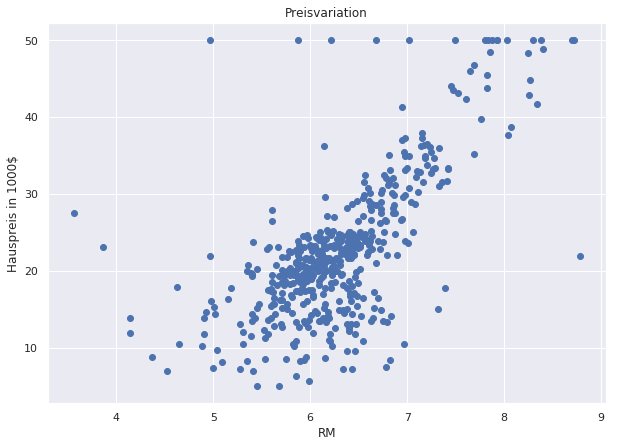

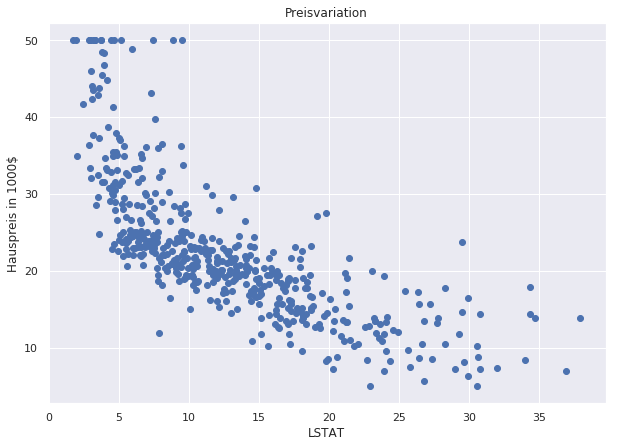

In [39]:
#Alle Features, die für den Preis eine starke correlation gezeigt haben
features = ['RM','LSTAT']

for i, col in enumerate(features):
    x = boston[col]
    plt.scatter(x, Y, marker='o')
    plt.title("Preisvariation")
    plt.xlabel(col)        
    plt.ylabel("Hauspreis in 1000$")
    plt.show()

In [0]:
#Daten auf LSTAT und RM begrenzen
X_L_R = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y_L_R = boston['MEDV']

In [62]:
#Trainingsset und Testdaten für LSTAT und RM
X_L_R_train, X_L_R_test, Y_L_R_train, Y_L_R_test = train_test_split(X_L_R, Y_L_R, test_size = 0.2, random_state=5)
print(X_L_R_train.shape)
print(X_L_R_test.shape)
print(Y_L_R_train.shape)
print(Y_L_R_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


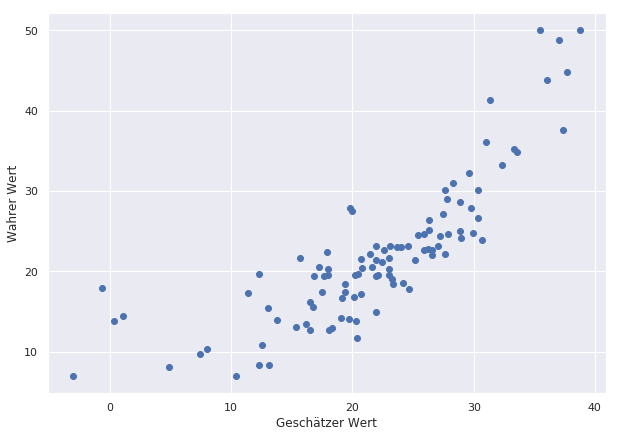

In [63]:
#Lineare Regression für unsere Trainingsdaten und dann Testdaten predicten nur mit den Attributen LSTAT und RM
lin_reg_L_R = LinearRegression()
lin_reg_L_R.fit(X_L_R_train, Y_L_R_train)
y_L_R_train_predict = lin_reg_L_R.predict(X_L_R_test)

#plt.figure(figsize=(20,10))
plt.scatter(y_L_R_train_predict, Y_L_R_test)
plt.xlabel("Geschätzer Wert")
plt.ylabel("Wahrer Wert")
plt.show()

In [74]:
mse = mean_squared_error(Y_L_R_test, y_L_R_train_predict)
print("Mean Squared Error: ", mse)

rmse = (np.sqrt(mean_squared_error(Y_L_R_test, y_L_R_train_predict)))
print("Root MSE: ", rmse)

Mean Squared Error:  26.39288682266609
Root MSE:  5.137400784702911


In [77]:
#Ausgedachtes Haus predicten
X_L_R_train_house = np.array(X_L_R_train)
house_2 = X_L_R_train_house[0]*1.1
print("Ausgedachtes Haus mit folgenden Werten: ", house)

pred_value = lin_reg_L_R.predict(house_2.reshape(1, -1))
print("Geschätzter Wert:", pred_value)

Ausgedachtes Haus mit folgenden Werten:  [  1.266892   0.         8.954      0.         0.5918     6.2711
 104.5        4.16592    4.4      337.7       23.1      394.647
  20.185   ]
Geschätzter Wert: [17.03947517]


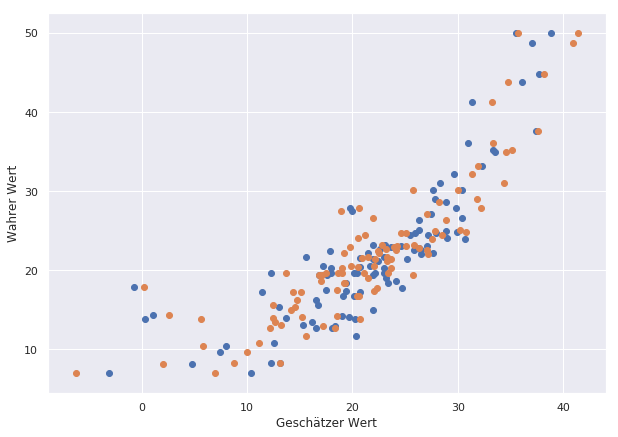

In [73]:
#Graph mit geschätzen Werten mit allen Attributen und Graph mit geschätzen Werten nur mit LSTAT und RM
plt.scatter(y_L_R_train_predict, Y_L_R_test)
plt.scatter(y_train_predict, Y_test)
plt.xlabel("Geschätzer Wert")
plt.ylabel("Wahrer Wert")
plt.show()

# **Antwort**

Zuerst haben wir eine Lineare Regression mit allen Attributen außer MEDV und es den Graphen angeschaut. Daraufhin haben wir uns die einzelnen Attribute im Verhältnis zum MEDV angeschaut und uns ist aufgefallen, dass LSTAT und RM am ähnlichsten unserer Regression waren. Wenn die Raumanzahl (RM) linear steigt, steigt auch der Preis. Und wenn LSTAT zunimmst nehmen, die Preise ab. Um dies zu überprüfen haben wir uns die Werte in der Correlationsmatrix angeschaut und der Verdacht hat sich bestätigt. Für LSTAT haben wir einen Wert von -0.74 und für RM einen Wert von 0.7. Dies sind die höchsten Werte in der Matrix.
Daraufhin haben wir die Daten auf die Attribute reduziert, die den größten Einfluss auf unseren MEDV haben. Diese wurden wieder in Trainings und Testdaten eingeteilt und erneut eine Lineare Regression gemacht. Zuletzt haben wir noch die Vorhersage mit allen Attributen über die Vorhersage mit den Attributen RM und LSTST gelegt und Festgestellt, dass sich der Graph bis auf Ausreißerdaten sehr ähnelt und somit unsere Vermutung, dass LSTAT und RM den größten Einfluss haben bestätigt.